# Workshop 1️⃣ EDA & Study Design

**🎨 Team 2**

`2`

**👥 Authors**

`Add your names here (alphabetically)`


* Christian Gobern
* Lennon Farias
* Yueran Jia
* Jonathan Patscheider
* Ariella Johnson 
* Xiaomeng Ma
* Urvish
* Barbara Lam

**🎯 Goals of this Workshop**
1. Define Inclusion Criteria to build a working cohort
2. Explore the Ground-Truths, present in the data set


**✏️ Expected Deliverables**
1. Flow chart with inclusion and exclusion criteria, reporting who's being left out, by demographics
2. Define the Machine Learning Task to be addressed



**❗ Highlighted Pitfall(s)**
* Sampling and Representation Bias

## 0. Understand the Problem and Dataset

Please go through [Workshop 0](https://colab.research.google.com/gist/joamats/08338a27a51c02179f3d5e8b8f15cecb/workshop_0.ipynb) for an Introduction on the Problem, Dataset and Objective of the Datathon. As the Datathon schedule is very tight, this should be studied prior to attending the Event.


## 1. Inclusion/exclusion Criteria Definition

In discussion between Data Scientists and Clinicians, try to answer these questions:
* What is a reasonable $SaO_2$ and $SpO_2$ cut-off value to avoid aberrant values and venous blood gas value?
* What is a reasonable time offset between $SaO_2$ and $SpO_2$ to create a pair?
* Are there patients from any demographics or with certain comorbidities that should not be included?
* Is there any specific treatment information that may influence?
* How to deal with multiple pairs per patient?


When taking these decisions, keep these into consideration:
* Are we keeping a reasonable amount of patients?
* What are the consequences of these decisions if we were to implement the result of this project in a real setting?
* Are we seggregating any group of patients?
* Are there groups that are more likely to be dropped in any approach and could introduce sampling selection bias?


### ✏️ Discussed Criteria
`Fill in with the ones you come up with as a team `

* 
* 

## 2. Study Cohort Creation

**What is a Flowchart in this context?**

A Flowchart reflects the study cohort creation, by selecting the patients that best suit our study design.

It is a helpful tool to visualize the numbers after applying our inclusion and exclusion criteria.

**Example (part of one):**

<div>
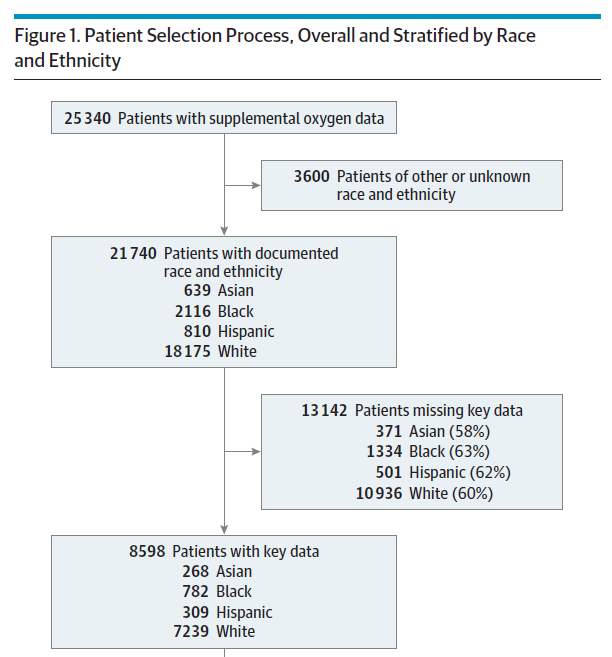
</div>

**Source:**
Gottlieb ER, Ziegler J, Morley K, Rush B, Celi LA. Assessment of Racial and Ethnic Differences in Oxygen Supplementation Among Patients in the Intensive Care Unit. JAMA Intern Med. 2022;182(8):849–858. https://doi:10.1001/jamainternmed.2022.2587

### ✏️ Initial Exploratory Data Analysis (EDA)

`Create code below to answer the following questions`



How many patients do we have per racial-ethnic group, sex, and other demographics?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Datathon/mimic_pulseOx_data.csv")

In [ ]:
data.head()

,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,1,...,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
1,10001884,37510196,2131-01-13 02:28:00,92.0,-28,94,0,26184834,F,1,...,-27,98.0,-28.0,22.0,92.0,36.56,121.0,199.0,-28.0,SR (Sinus Rhythm)
2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,F,1,...,-3,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm)
3,10002013,39060235,2160-05-18 17:42:00,96.0,-42,97,0,23581541,F,1,...,18,73.0,18.0,23.0,18.0,36.70,0.0,149.0,18.0,ST (Sinus Tachycardia)
4,10002013,39060235,2160-05-18 21:32:00,97.0,-32,98,0,23581541,F,1,...,28,86.0,28.0,18.0,28.0,37.50,0.0,141.0,28.0,SR (Sinus Rhythm)


What is the $SaO_2$ / $SpO_2$ measurement values range?

---




In [ ]:
# Code here!
# 88% - 100 %


What is the typical $SaO_2$ - $SpO_2$ time offset?

In [ ]:
# Code here!
# 5 - 30 minute

Does that offset significantly vary for certain groups?

In [ ]:
# Code here!

How many pairs do we have per patient?


In [ ]:
# Code here!

Are there groups with different no. pairs?

In [ ]:
# Code here!

These questions are mere examples. Which other questions are relevant?

In [ ]:
# Code here!

In [ ]:
# Code here!

In [ ]:
# Code here!

### ✏️ Apply you Inclusion / Exclusion Criteria

Now that we have done some Initial EDA, let's define criteria for the study cohort selection

**How to identify Sampling and Representation Bias in a systematic way?**

When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias.

We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria. 

**This is a good practice of study cohort selection!**

In [ ]:
import pandas as pd
from typing import Dict

def get_demography(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """Get the demography of the cohort.

    Args:
        df (pd.DataFrame): The cohort dataframe.

    Returns:
        dict: A dictionary containing demographic information such as race, sex, 
              and English proficiency, with corresponding proportions.
    """
    demo = {}
    
    demo["race"] = df["race_group"].value_counts(normalize=True).to_dict()

    demo["sex"] = {
        "Male": df["sex_female"].value_counts(normalize=True)[0],
        "Female": df["sex_female"].value_counts(normalize=True)[1]
    }
    
    demo["language"] = df["language"].value_counts(normalize=True).to_dict()

    # You can add other Variables here, following the same structure

    return demo

def print_demo(demo):
    """ Print
      Args:
        dict: A dictionary containing demographic information such as race, sex, 
                English proficiency, ..., with corresponding proportions.
      Returns:
        str: A formatted string to display demographics, that can be printed. 
    """

    demo_str = ""
    for key, value in demo.items():
        if isinstance(value, dict):
            demo_str += f"{key}: ["
            for key2, value2 in value.items():
                demo_str += f"{key2}: {round(value2*100,1)}%, "
            demo_str = demo_str[:-2] + "]\n "
        else:
            demo_str += f"{key}: {round(value*100,1)}%, "
    demo_str = demo_str[:-2]

    return demo_str

  

In [ ]:
# Working Example on the Dataset we just loaded
print_demo(get_demography(data))

NameError: ignored

We suggest this structure to systematically get the numbers to produce a flowchart:
```
# Remove patients XXX
data_1 = data[data.YYY != XXX]
print(f"Removed {len(data) - len(data_1)} patients without XXX")
demo1 = print_demo(get_demography(df1))
print(f"{len(data_1)} stays with ZZZ \n({demo1})\n")

# Remove ... 
data_2 = ...
```



In [ ]:
data['delta_SpO2'].describe()

count    81797.000000
mean       -26.009511
std         17.978644
min        -90.000000
25%        -40.000000
50%        -24.000000
75%        -11.000000
max          0.000000
Name: delta_SpO2, dtype: float64

In [ ]:
data['delta_vent_start'].describe()


count    71727.000000
mean     -3711.441954
std       6208.705199
min     -86949.000000
25%      -4399.000000
50%      -1231.000000
75%       -350.000000
max          0.000000
Name: delta_vent_start, dtype: float64

In [ ]:
# Code here!


data_withinInclusion = data[data.delta_SpO2>=-30]
data_neverincubated = data_withinInclusion[data_withinInclusion.invasive_vent==0]
data_incubated = data_withinInclusion[data_withinInclusion.invasive_vent==1]

data_incubatedOut = data_incubated[data_incubated.delta_vent_start<-30]


print(  len(data_neverincubated)+len(data_incubatedOut))
print(len(data) - len(data_neverincubated)-len(data_incubatedOut))

cohort_data=pd.concat([data_neverincubated,data_incubatedOut])
print(len(cohort_data))

# print(f"Removed {len(data) - len(data_offset)} patients without XXX")
# demo1 = print_demo(get_demography(data_offset))
# print(f"{len(data_offset)} stays with ZZZ \n({demo1})\n")


49733
32064
49733


In [ ]:
data["hemoglobin"].describe()

count    81750.000000
mean         9.920683
std          1.702246
min          1.500000
25%          8.700000
50%          9.800000
75%         10.900000
max         21.700000
Name: hemoglobin, dtype: float64

In [ ]:
cohort_data["hemoglobin"].describe()

count    49702.000000
mean         9.941833
std          1.694565
min          1.800000
25%          8.800000
50%          9.800000
75%         10.900000
max         19.800000
Name: hemoglobin, dtype: float64

In [ ]:
data_neverincubated["sofaSum"]=data_neverincubated["sofa_coag"] + data_neverincubated["sofa_cv"] +  data_neverincubated["sofa_cns"] 
data_incubated["sofaSum"]=data_incubated["sofa_coag"] + data_incubated["sofa_cv"] +  data_incubated["sofa_cns"] 
data_neverincubated["sofaSum"].describe()

<ipython-input-5-e9992d1c62a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_neverincubated["sofaSum"]=data_neverincubated["sofa_coag"] + data_neverincubated["sofa_cv"] +  data_neverincubated["sofa_cns"]
<ipython-input-5-e9992d1c62a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_incubated["sofaSum"]=data_incubated["sofa_coag"] + data_incubated["sofa_cv"] +  data_incubated["sofa_cns"]


count    12201.000000
mean         2.193181
std          1.850203
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: sofaSum, dtype: float64

In [ ]:
data_incubated["sofaSum"].describe()

count    38060.000000
mean         2.572491
std          2.073145
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         12.000000
Name: sofaSum, dtype: float64

In [ ]:
print_demo(get_demography(cohort_data))


'race: [White: 67.7%, Non-White: 32.3%]\n sex: [Male: 64.9%, Female: 35.1%]\n language: [ENGLISH: 88.5%, ?: 11.5%]'

In [ ]:
print_demo(get_demography(data))

'race: [White: 67.5%, Non-White: 32.5%]\n sex: [Male: 64.7%, Female: 35.3%]\n language: [ENGLISH: 88.6%, ?: 11.4%]'

In [ ]:
data_1['invasive_vent'].unique()

array([0, 1])

`Create a visual diagram and Upload it here:`

0


`Save your dataframe to be used from now on:`

In [ ]:
cohort_data.to_csv("/content/drive/MyDrive/Datathon/cohort.csv")

**MIMIC-IV Demographics (for Comparison with your Cohort)**

This is not exhaustive, but should be if we were to apply this in a real-world scenario!

| Variable                 |          | MIMIC-IV|
|--------------------------|----------|---------|
| **Total Patients**       |          | 50,920|
| **Race-Ethnicity (%)**   | Asian    | 2.94    |
|                          | Black    | 10.9    |
|                          | Hispanic | 3.83    |
|                          | Other    | 14.2    |
|                          | White    | 68.2    |
| **Sex (%)**              | Female   | 44.2    |
| **Proficiency (%)**      | Limited  | 10.2    |


### ✏️ Sampling Selection Bias

Comparing your cohort with MIMIC-IV demographics, what differences can you identify?

`Report and Discuss Sampling Selection Bias:`



* race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]\n sex: [Male: 64.7%, Female: 35.3%]\n language: [ENGLISH: 88.6%, ?: 11.4%]
demographic of cohorted data, no appeared difference

* interesting differences: greater male, "other", in cohort, and less black in cohort too

**Other Sources of Sampling Selection Bias - Consider this:**

*Black and Hispanic individuals are less likely to receive potentially life-saving cardiopulmonary resuscitation (CPR) from bystanders compared to White individuals, according to a [NEJM study](https://www.nejm.org/doi/full/10.1056/NEJMoa2200798?query=recirc_curatedRelated_article)*.

Garcia, R. A., Spertus, J. A., Girotra, S., Nallamothu, B. K., Kennedy, K. F., McNally, B. F., Breathett, K., Del Rios, M., Sasson, C., & Chan, P. S. (2022). Racial and Ethnic Differences in Bystander CPR for Witnessed Cardiac Arrest. The New England journal of medicine, 387(17), 1569–1578. https://doi.org/10.1056/NEJMoa2200798


**Who does not make it to MIMIC-IV in the first place?**

**Who does not make it to our Pulse Oximetry dataset?**

Is it because of:

* Sampling selection bias as regards who have access to healthcare?

* Sampling selection bias as regards the hospital’s ICU admission criteria?

* Sampling selection bias from Measurement Bias (irregular sampling for certain groups)?

### ✏️ Discussion and Potential Solutions

`As a group, think of other sources and potential solutions:`

* 

* 

## 3. Data Exploration and Visualization

Now that we have our study cohort, let's look at the ground-truths of the data.



The dataset we created has a binary variable "hidden_hypoxemia" where $SaO_2$ < 88% but $SpO_2$ ≥ 88%.

This is just a possibility. Different studies have different definitions. Discuss with the clinicians which definition is better suited for this problem, taking into consideration the trade-off acuity of Hidden Hypoxemia and sample size.

### ✏️ Hidden Hypoxemia (HH) Definition 

`What is your HH Definition?`

In [ ]:
SaO2_HH = 0.88 # xx%, actual oxygen saturation is below this value
SpO2_HH = 0.88# yy%, but Pulse Oximeter measurement is above this



`If different from the one we defined, create a new column in your dataset with it:`



In [ ]:
data['HH_study'] = data.apply(lambda row: 1 if(row.SaO2 <  SaO2_HH) \
                                            & (row.SpO2 >= SpO2_HH) \
                                            else 0, axis =1)

In [ ]:
import numpy as np

cohort_data['HH_study'] = cohort_data.apply(lambda row: 1 if(np.abs(row.SaO2 - row.SpO2) >= 4) 
                                            else 0, axis =1)

### ✏️ Visualizations

#### Calibration Maps

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns


def sao2_spo2_plot(df, SaO2_HH=88, SpO2_HH=88,
                   lbl_text="Measured"):

    r2 = r2_score(df.SaO2, df.SpO2)

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(5,5)

    ax_scatter = fig.add_subplot(gs[1:5, 0:4])

    df_norm = df[~((df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH))]
    df_hypo = df[(df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH)]

    hh = len(df_hypo)
    tot = len(df_norm) + len(df_hypo)

    sns.scatterplot(df_norm, x='SpO2', y='SaO2',
                    marker='o', alpha=0.1, ax=ax_scatter)
    sns.scatterplot(df_hypo, x='SpO2', y='SaO2',
                    marker='o', color="tab:red", alpha=0.1, ax=ax_scatter,
                    label="H.H")
    ax_scatter.set_xlabel(f'{lbl_text} SpO2 (%)')
    ax_scatter.set_ylabel('SaO2 (%)')
    ax_scatter.set_xlim([64, 102])
    ax_scatter.set_ylim([64, 102])
    ax_scatter.grid(False)
    ax_scatter.get_legend().remove()

    ax_hist_x = fig.add_subplot(gs[0,0:4])
    sns.kdeplot(x=df.SpO2, ax=ax_hist_x, color='green', fill=True)
    ax_hist_x.xaxis.set_ticklabels([])
    ax_hist_x.grid(False)
    ax_hist_x.set_xlabel('')
    ax_hist_x.set_ylim([0,.35])
    ax_hist_x.axvline(x=df.SpO2.mean(), linewidth=0.8,
                    linestyle='--', color='green',
                    label="SpO2 Mean")


    ax_hist_y = fig.add_subplot(gs[1:5, 4])
    sns.kdeplot(y=df.SaO2, ax=ax_hist_y, color='orange', fill=True)
    ax_hist_y.yaxis.set_ticklabels([])
    ax_hist_y.grid(False)
    ax_hist_y.set_ylabel('')
    ax_hist_y.set_xlim([0,.35])
    ax_hist_y.axhline(y=df.SaO2.mean(), xmin=0, xmax=1,
                    linewidth=0.8, linestyle='--', color='orange',
                    label="SaO2 Mean")

    fig.legend(loc='upper right', bbox_to_anchor=(0.915, 0.85),
               ncol=1, fontsize=9)

    fig.suptitle(f"SaO2 vs SpO2: R\u00B2 = {r2:.2f}, H.H = {hh} / {tot}",
                 fontsize=16, y=0.95)

    plt.show()


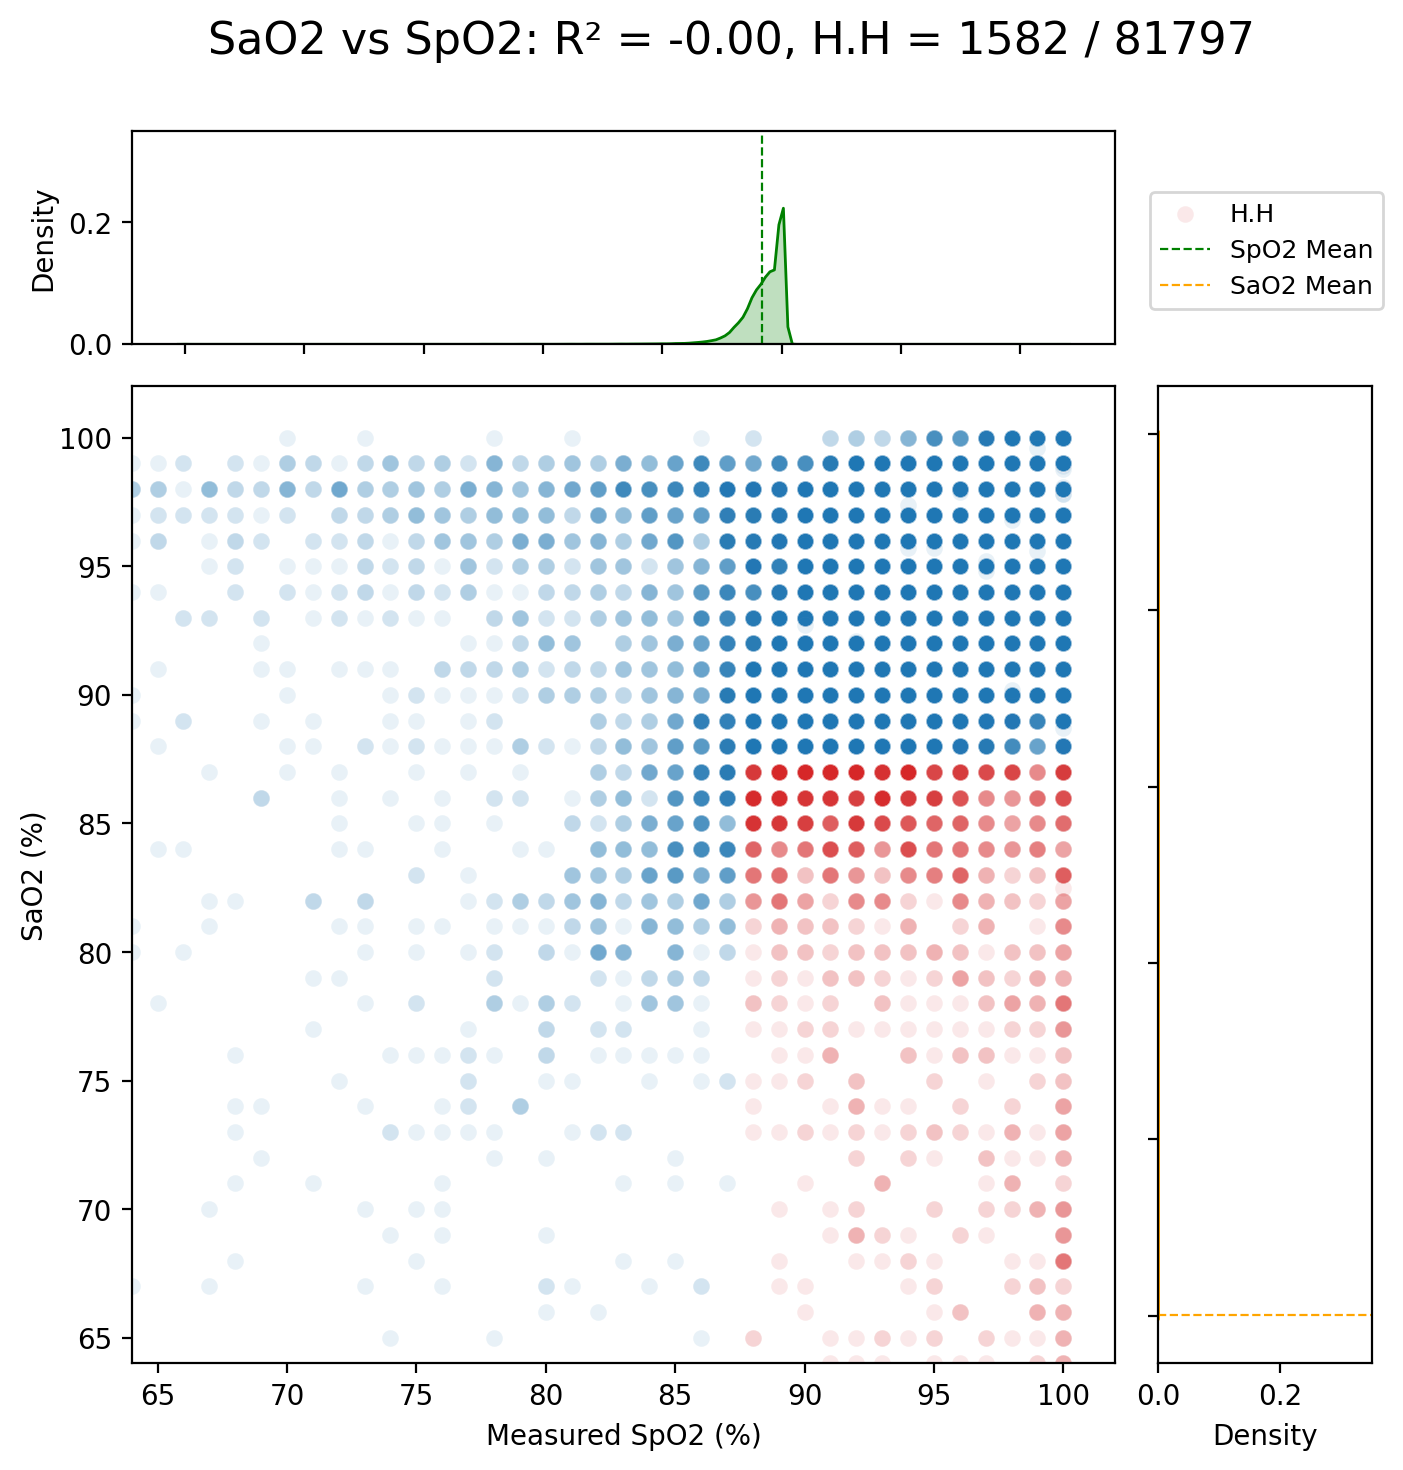

In [ ]:
sao2_spo2_plot(data, SaO2_HH=88, SpO2_HH=88, lbl_text="Measured")

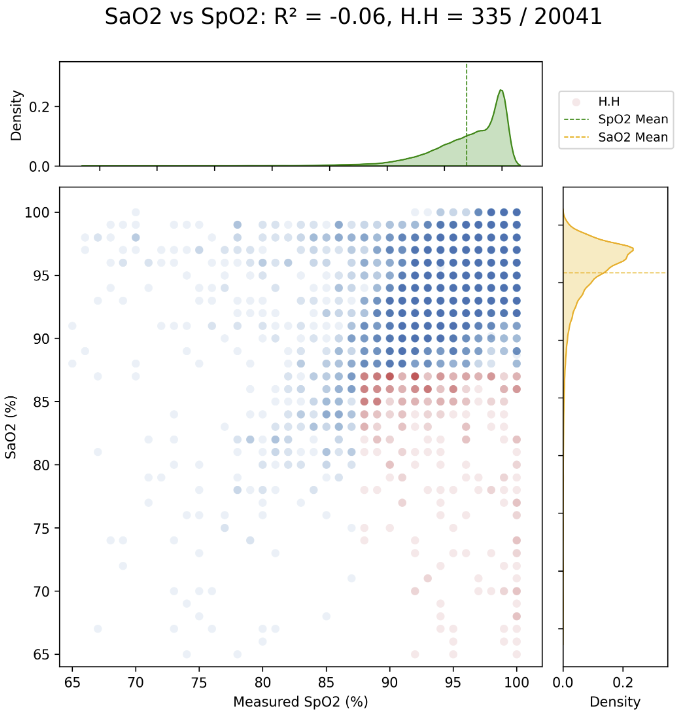

#### Measurements Distributions

In [ ]:
def sao2_spo2_dists(data, races):

  fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True,
                        figsize=(2 * len(races), 5))

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SaO2, ax=ax[i],
                  color='orange', fill=True, label="SaO2")
      sns.kdeplot(x=data[data.race_group == r].SpO2, ax=ax[i],
                  color='green', fill=True, label="SpO2")
      ax[i].set_xlim([90,100])
      ax[i].legend(loc='upper left', ncol=1, fontsize=9)
      ax[i].set_xlabel('O2 Saturation (%)')
      ax[i].set_title(f'{r} Patients')

  fig.suptitle('SaO2 and SpO2 Density Distributions')
  plt.show()

In [ ]:
def sao2_spo2_plot(data):

  fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True,
                        figsize=(5))
  sns.kdeplot(x=data.SaO2,
    color='orange', fill=True, label="SaO2")
  ax.set_xlim([90,100])
  ax.legend(loc='upper left', ncol=1, fontsize=9)
  ax.set_xlabel('O2 Saturation (%)') 
  ax.set_title(f'Patient')

  plt.show()

In [ ]:
# Encode Race Groups
data.race_group = data.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = data.race_group.unique() #["White", "Non-White"]

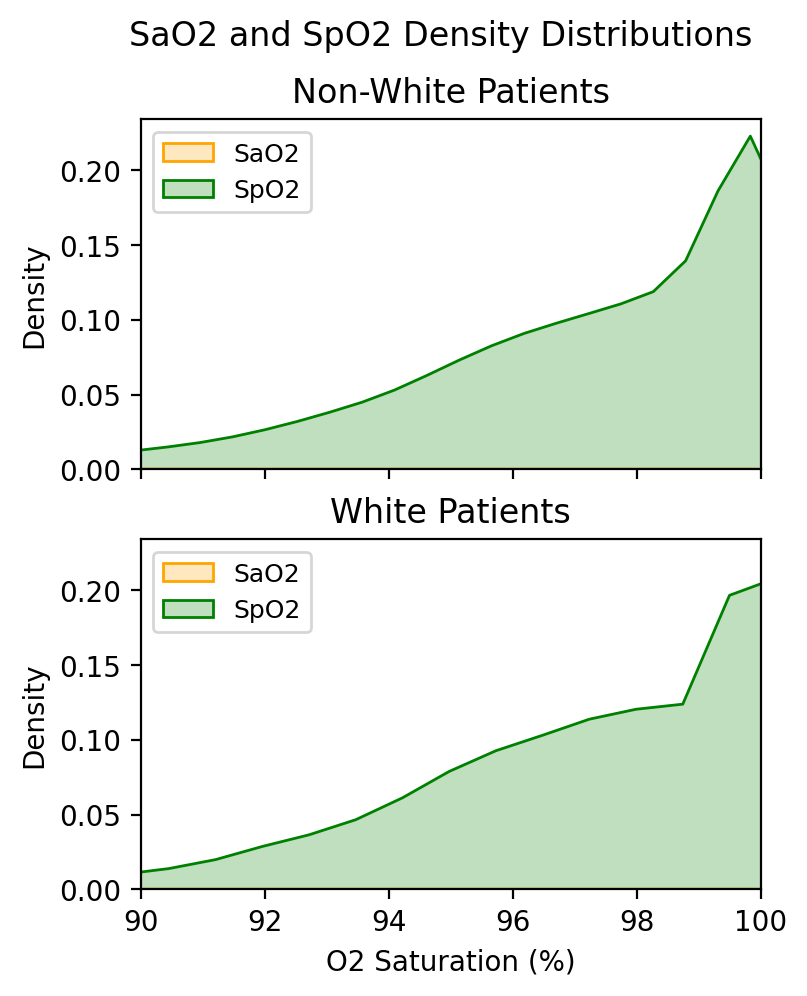

In [ ]:
sao2_spo2_dists(data, races)

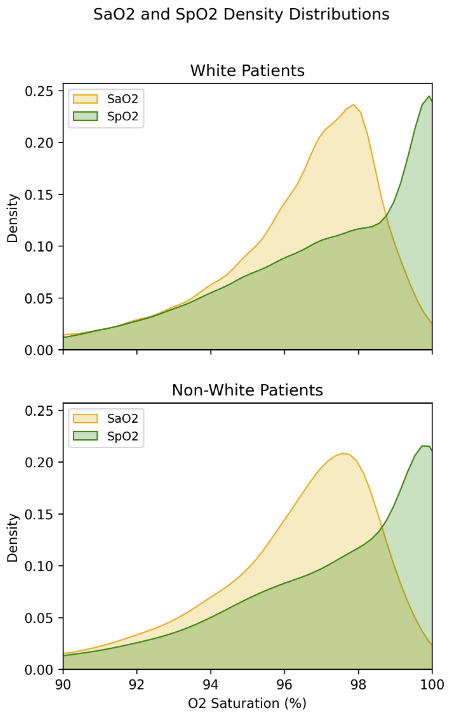

#### Gap Distributions

In [ ]:
def sao2_spo2_gap(data, races, comparison="White vs. Non-White"):

  fig, ax = plt.subplots(1, 1, sharex= True, sharey=True, figsize=(8,4))

  colors = ['green', 'black']

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SpO2 - data[data.race_group == r].SaO2,
                  ax=ax, color=colors[i], fill=True, label=r)
      
  ax.set_xlim([-4,4])
  ax.legend(loc='upper left', ncol=1, fontsize=9)
  ax.set_xlabel('SpO2 - SaO2 (%)')
  ax.set_title(f'SpO2 - SaO2 Gap Distribution, {comparison} Patients')

  plt.show()

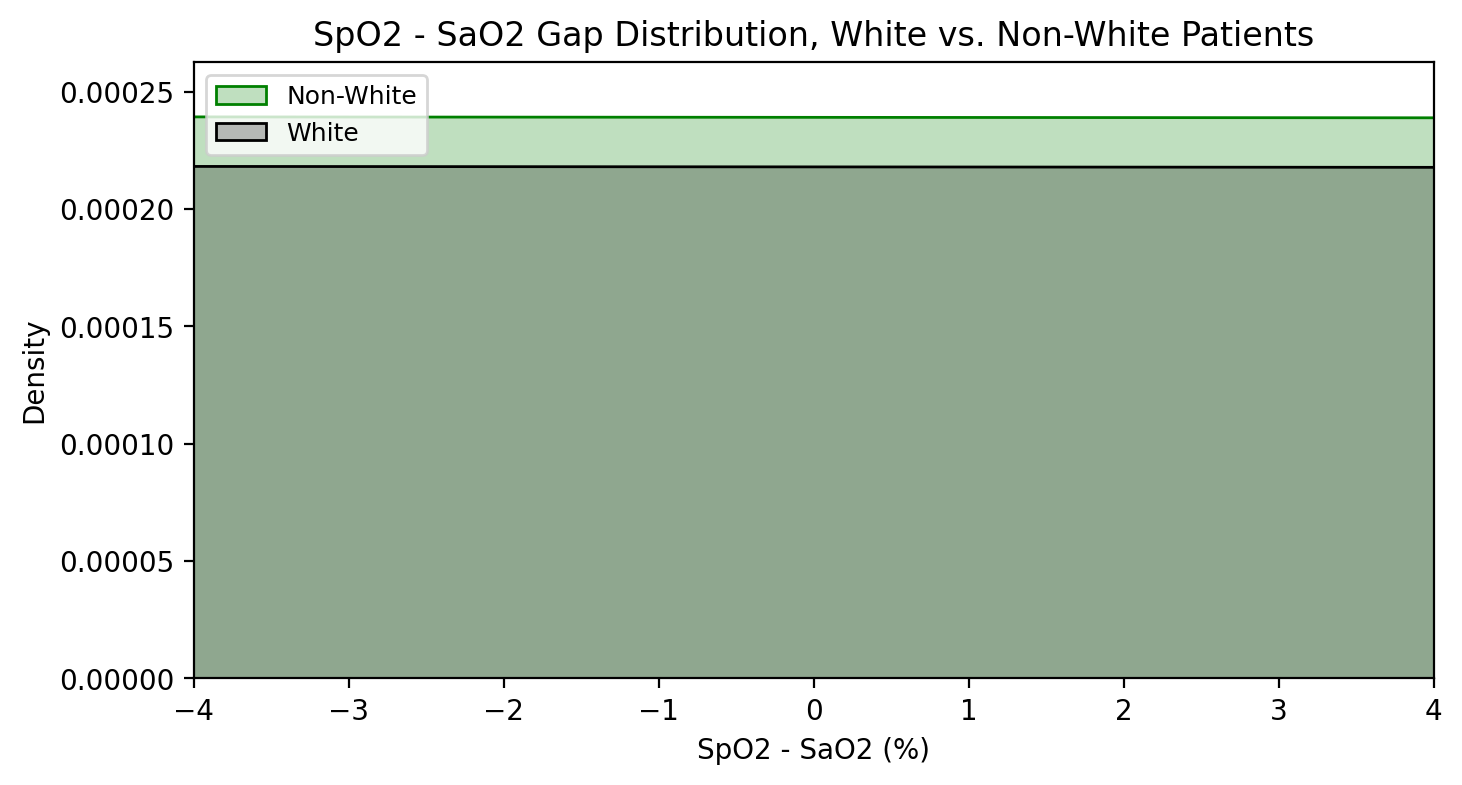

In [ ]:
sao2_spo2_gap(data, races, comparison="White vs. Non-White")

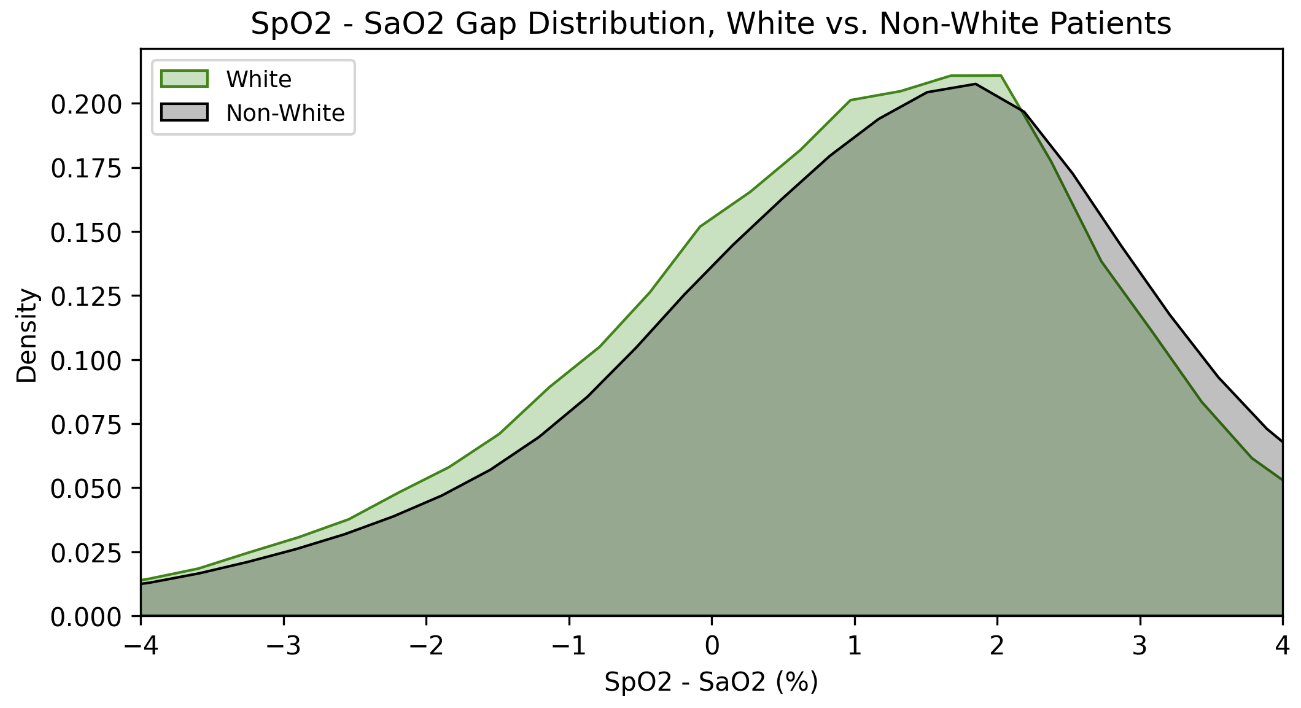

### ✏️ Further EDA
`Create code below to answer the following questions`


What is the Outcome Distribution? 

In [ ]:
# Code here!

Is it more pronounced across certain groups?

In [ ]:
# Code here!

Add Other Questions that may be relevant

In [ ]:
# Code here!

In [ ]:
# Code here!

## 4. ML Task Definition

​
**We suggest (but not limited to), 4 possible ML tasks:**

* Hidden Hypoxemia Prediction (Classification)
* $SaO_2$ Prediction (Regression)
* $SaO_2 - SpO_2$ Gap Prediction (Regresion)
* $SaO_2 - SpO_2$ Gap Magnitude Prediction (Classification)

Discuss, as a team:

* Which task yields more value to tackle the presented problem?

* Which task is more prone to errors or biases?

* Where do we have more information?

* Where is there more outcome imbalance?

* Which decision-support algorithm would not harm patients further?

* How will the evaluation be done if we pick a certain task?

* Can we solve more than one task at once?



**Keep in mind that there is no right answer!**
​

In [ ]:
cohort_data['BMI'].describe()

count    40102.000000
mean        29.804631
std          7.394496
min          7.431629
25%         24.816327
50%         28.601294
75%         33.145212
max        100.897959
Name: BMI, dtype: float64

In [ ]:
cohort_data['ph'].describe()

count    49691.000000
mean         7.384273
std          0.081578
min          6.780000
25%          7.340000
50%          7.390000
75%          7.440000
max          7.750000
Name: ph, dtype: float64

In [ ]:
cohort_data['HH_study'] = cohort_data.apply(lambda row: 1 if(row.SaO2 <  SaO2_HH) \
                                            & (row.SpO2 >= SpO2_HH) \
                                            else 0, axis =1)

In [ ]:
cohort_data['hemoglobin'].describe()

count    49702.000000
mean         9.941833
std          1.694565
min          1.800000
25%          8.800000
50%          9.800000
75%         10.900000
max         19.800000
Name: hemoglobin, dtype: float64

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def logistic_on_race(df):
  gbins=[0,20,40,60,80,100,120,140,160,180,200,220,240,260]
  df['glucose_bin']= pd.cut(df['glucose'], gbins)

  dummy_vars = pd.get_dummies(df['glucose_bin'], prefix='Bin')
  df = pd.concat([df, dummy_vars], axis=1)
  df['glucose_bin']=df['glucose_bin'].cat.codes

  phbins=[0,1,2,3,4,5,6,7,8]
  df['ph_bin']= pd.cut(df['ph'], phbins)

  dummy_vars = pd.get_dummies(df['ph_bin'], prefix='Bin')
  df = pd.concat([df, dummy_vars], axis=1)
  df['ph_bin']=df['ph_bin'].cat.codes

  FiO2bin=[0,10,20,30,40,50,60,70,80,90,100]
  df['FiO2bins']= pd.cut(df['FiO2'], gbins)

  dummy_vars = pd.get_dummies(df['FiO2bins'], prefix='Bin')
  df = pd.concat([df, dummy_vars], axis=1)
  df['FiO2bins']=df['FiO2bins'].cat.codes

  hemobin=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,16,18,19]
  df['hemobins']= pd.cut(df['hemoglobin'], gbins)

  dummy_vars = pd.get_dummies(df['hemobins'], prefix='Bin')
  df = pd.concat([df, dummy_vars], axis=1)
  df['hemobins']=df['hemobins'].cat.codes

  X=df[['SpO2','FiO2','glucose']]

  y=df['SaO2']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
  model = LogisticRegression()

# Fit the logistic regression model to the training data
  model.fit(X_train, y_train)

# Make predictions on the test data
  y_pred = model.predict(X_test)

# Print the classification report
  print(classification_report(y_test, y_pred))



In [ ]:
cohort_data['race_group'].unique()
whitepatients = cohort_data[cohort_data.race_group=='White']
blackpatients= cohort_data[cohort_data.race_group=='Black']
logistic_on_race(cohort_data)
#sklearn

NameError: ignored

Optimization terminated successfully.
         Current function value: 0.409287
         Iterations 6
<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7f8f89b3a470>>


<ipython-input-56-40c325b77ad5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glucose_bin']= pd.cut(df['glucose'], bins)


In [ ]:
#SaO2 prediction
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder



df_encoded=pd.get_dummies(cohort_data['race_group'])

encoder = LabelEncoder()

# Encode the object variables into integers


print(logit_result.summary())

#calcjulate for AIC

Optimization terminated successfully.
         Current function value: 0.432720
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               HH_study   No. Observations:                49733
Model:                          Logit   Df Residuals:                    49729
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.01437
Time:                        14:34:37   Log-Likelihood:                -21520.
converged:                       True   LL-Null:                       -21834.
Covariance Type:            nonrobust   LLR p-value:                1.201e-135
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
glucose_bin      0.0250      0.006      4.433      0.000       0.014       0.036
race_Encoded    -0.0700

In [ ]:
df_encoded.head()

,Non-White,White
0,1,0
1,1,0
7,0,1
13,0,1
44,0,1


### ✏️ Pick one!

`Pick one, or suggest your own:`